<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Recurrent%20Neural%20Networks%20(RNN)%20LSTM%20Python%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recurrent Neural Network**

A recurrent neural network (RNN) is a deep learning model that is trained to process and convert a sequential data input into a specific sequential data output. Sequential data is data—such as words, sentences, or time-series data—where sequential components interrelate based on complex semantics and syntax rules.

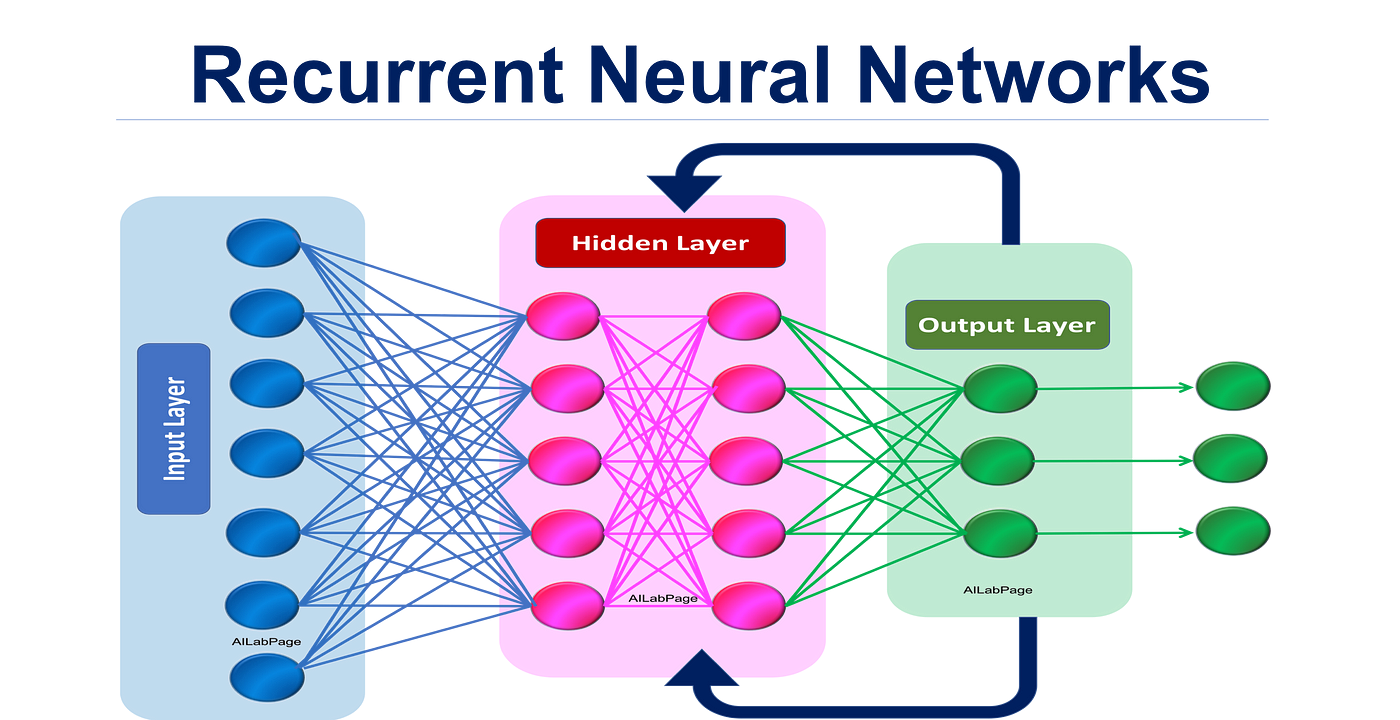

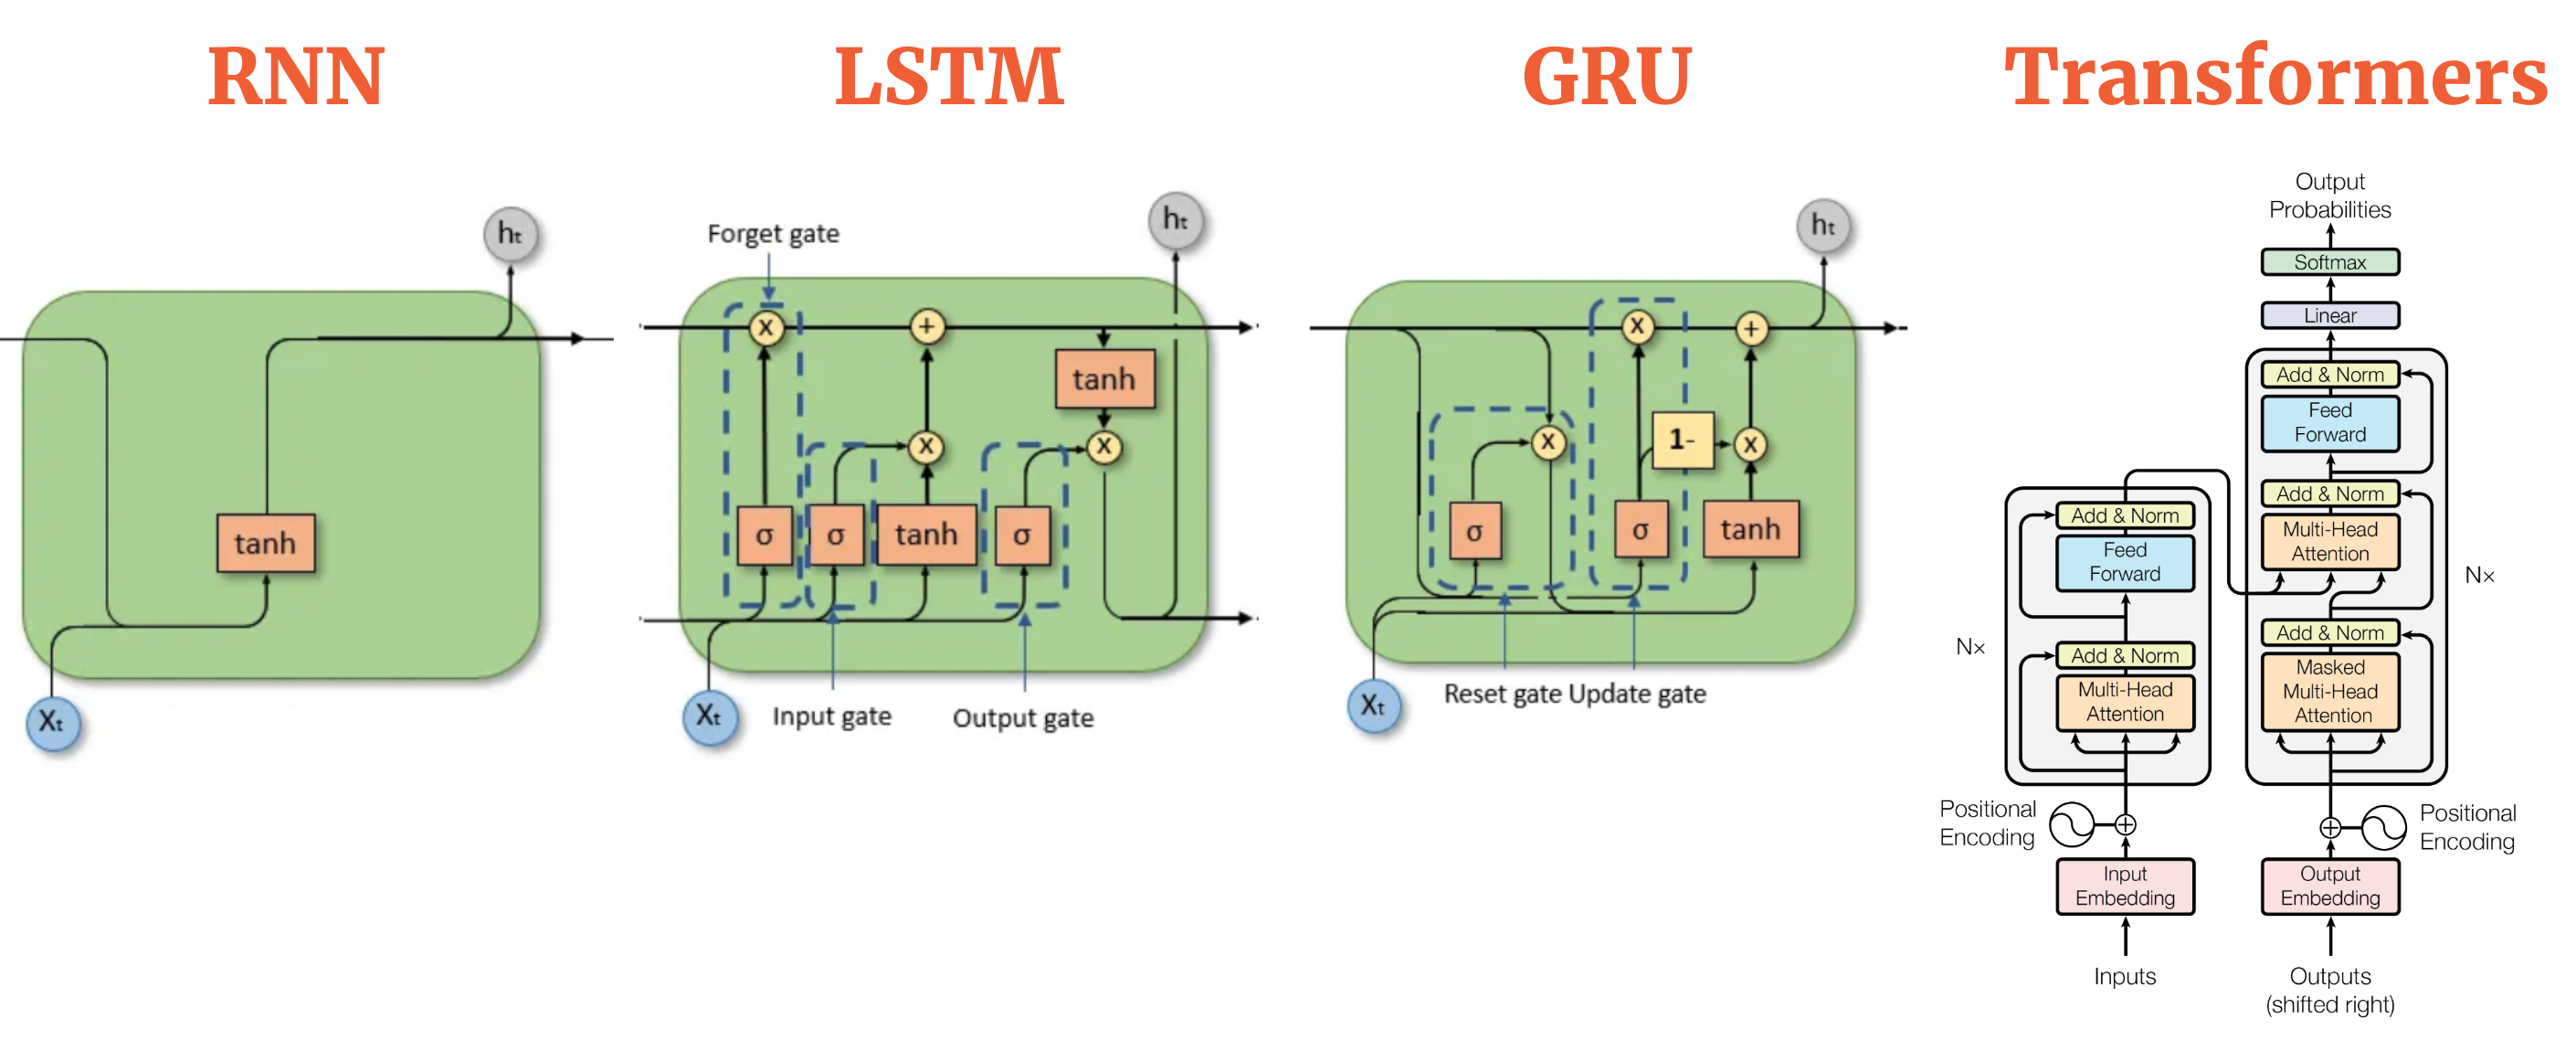

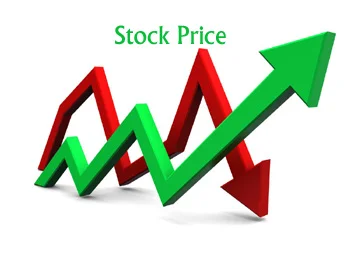

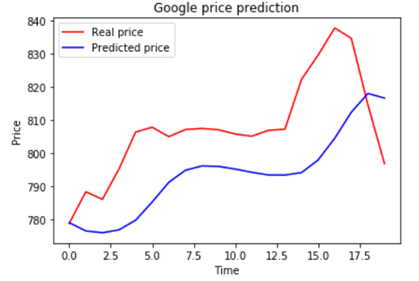

In [ ]:
#Loading Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load Dataset
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [ ]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
train=dataset_train.loc[:,['Open']].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
#Feature Scaling , range 0, 1
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_scaled=sc.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

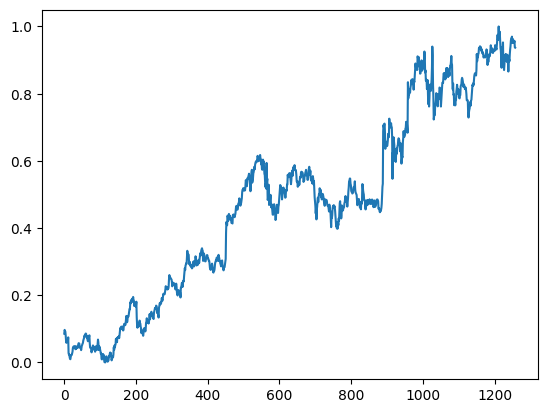

In [ ]:
plt.plot(train_scaled)
plt.show()

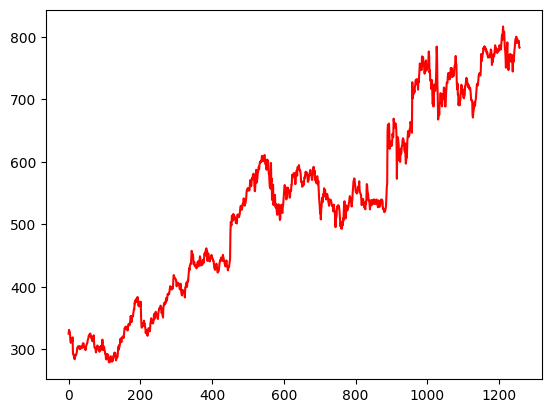

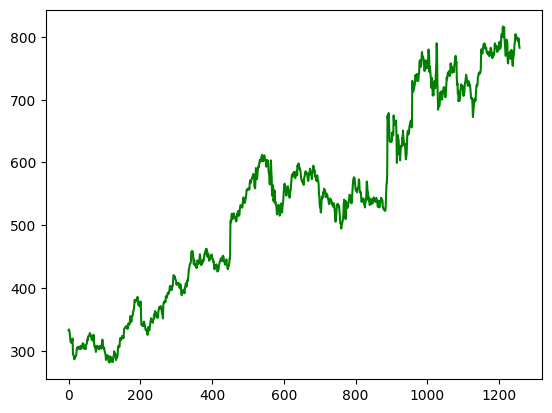

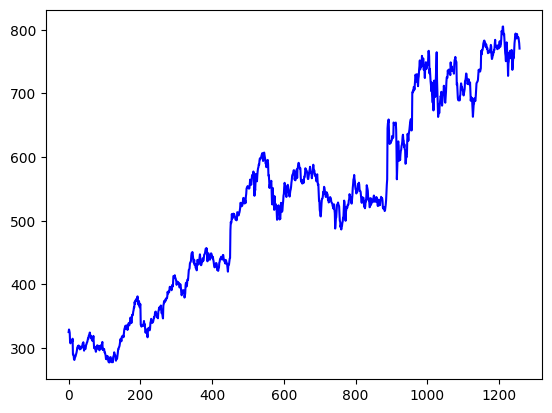

In [ ]:
dataset_train['Open'].plot(color='red')
plt.show()
dataset_train['High'].plot(color='green')
plt.show()
dataset_train['Low'].plot(color='blue')
plt.show()


In [ ]:
#Structure of coding
X_train=[]
y_train=[]
time_step=60
for i in range(time_step,1258):
  X_train.append(train_scaled[i-time_step:i,0])
  y_train.append(train_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
X_train.shape,y_train.shape

((1198, 60), (1198,))

In [ ]:
#Reshape the Data
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

# **Create RNN Model**

In [ ]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import SimpleRNN

#Initilize the RNN
regressor=Sequential()

#Adding the first RNN Layer and some Dropout regulization
regressor.add(SimpleRNN(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))


#Adding the second RNN Layer and some Dropout regulization
regressor.add(SimpleRNN(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the Third RNN Layer and some Dropout regulization
regressor.add(SimpleRNN(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the Fourth RNN Layer and some Dropout regulization
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

#Adding the Output Layer
regressor.add(Dense(units=1))

#Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

#Fitting the RNN to the Training Set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.4894
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.1953
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.1915
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.1317
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.1091
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0825
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0688
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0615
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0476
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0414
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0406
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0306
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0267
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0240
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - lo

In [ ]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,405 (208.62 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,604 (139.08 KB)

# **Prediction and visualization of RNN Model**

In [ ]:
data_test=pd.read_csv('Google_Stock_Price_Train.csv')
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
rl_stock_price=data_test.loc[:,['Open']].values
rl_stock_price

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
#Getting the predicted stock price
dataset_total=pd.concat((dataset_train['Open'],data_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(data_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


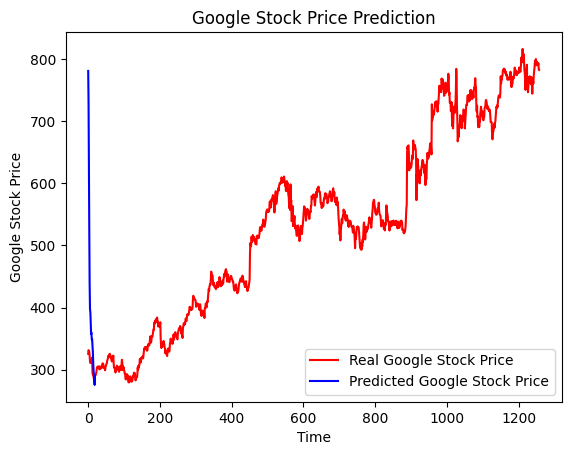

In [ ]:
#visualise the data
plt.plot(rl_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# **LSTM (Long Short Term Memory)**

for International airline passengers dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving international-airline-passengers.csv to international-airline-passengers.csv


In [ ]:
dataset_test=pd.read_csv('international-airline-passengers.csv')
dataset_test.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


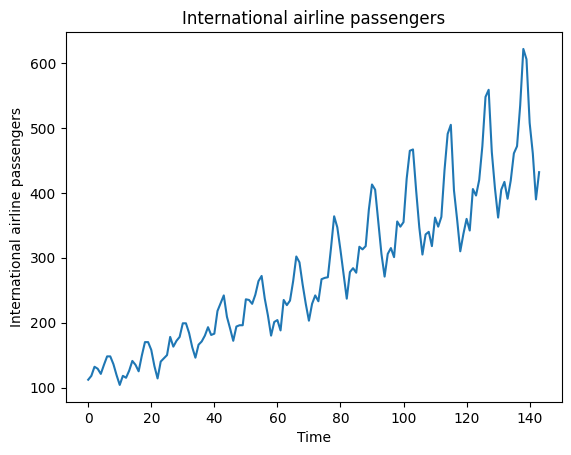

In [ ]:
dataset=dataset_test.iloc[:,1:2].values
plt.plot(dataset)
plt.xlabel('Time')
plt.ylabel('International airline passengers')
plt.title('International airline passengers')
plt.show()

In [ ]:
#Preprocessing Data
dataset=dataset.reshape(-1,1)
dataset=dataset.astype('float32')
print("Shape of data ",dataset.shape)
dataset.dtype

Shape of data  (145, 1)


dtype('float32')

In [ ]:
#Scaling the Data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
dataset=sc.fit_transform(dataset)
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [ ]:
#Training and testing the dataset
train_size=int(len(dataset)*0.60)
test_size=len(dataset)-train_size

train=dataset[0:train_size,:]
test=dataset[train_size:len(dataset),:]

print("Training Size ",train.shape)
print("Testing Size ",test.shape)

print("Training len ",len(train.shape))
print("Testing len ",len(test.shape))

Training Size  (87, 1)
Testing Size  (58, 1)
Training len  2
Testing len  2


In [ ]:
X=[]
y=[]
time_step=10
for i in range(len(train)-time_step-1):
  X.append(train[i:(i+time_step),0])
  y.append(train[i+time_step,0])
X,y=np.array(X),np.array(y)

trainx,trainy=np.array(X),np.array(y)
print(trainx.shape)
print(trainy.shape)

(76, 10)
(76,)


In [ ]:
trainX=np.reshape(trainx,(trainx.shape[0],1,trainx.shape[1]))
testX=np.reshape(test,(test.shape[0],1,test.shape[1]))
print(trainX.shape)
print(testX.shape)

(76, 1, 10)
(58, 1, 1)


# **Create the LSTM Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
#Create Model
import numpy as np
trainx = np.reshape(trainx, (trainx.shape[0], 1, trainx.shape[1]))

# Create the model
model = Sequential()
model.add(LSTM(10, input_shape=(1, trainx.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(trainx, trainy, epochs=50, batch_size=1)


Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.0231
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017
Epoch 16/50
76/76 

In [ ]:
#make predictions
trainPredict = model.predict(trainx)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


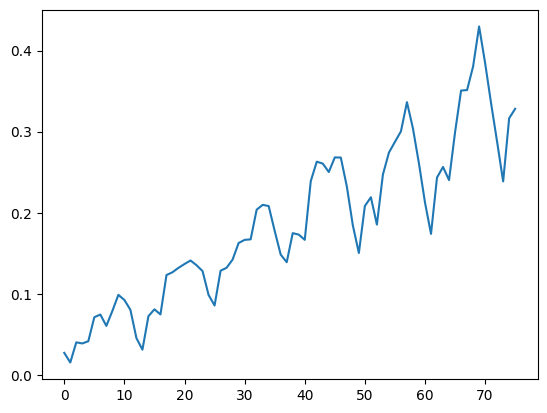

In [ ]:
plt.plot(trainPredict)
plt.plot()
plt.show()